In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
print("Tools loaded!")

Tools loaded!


In [2]:
from tensorflow.keras.datasets import cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
print("Dataset loaded! Pictures shape:", train_images.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Dataset loaded! Pictures shape: (50000, 32, 32, 3)


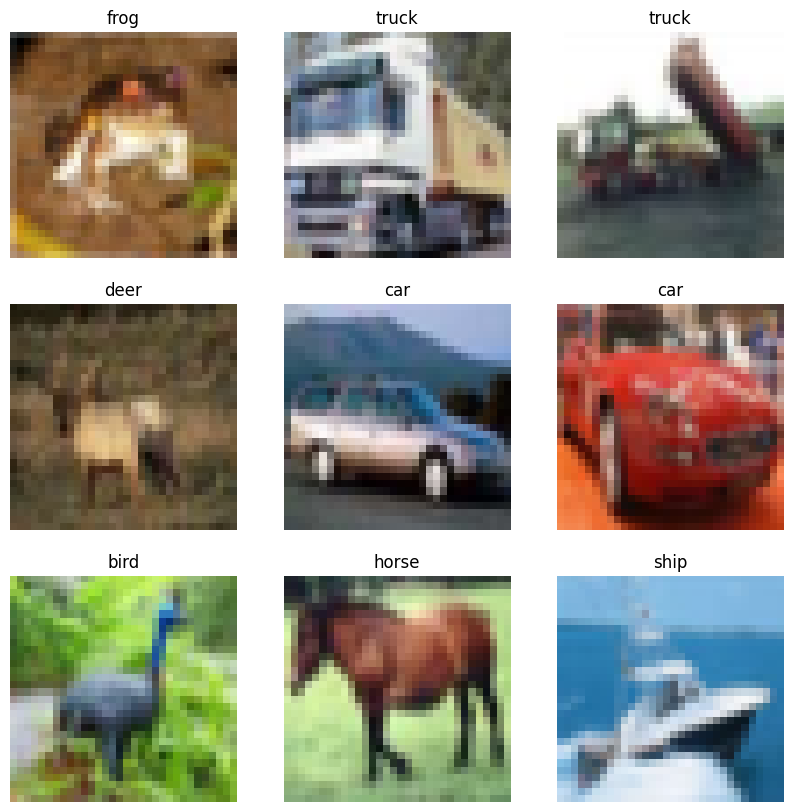

Look at these pictures!


In [3]:
class_names = ['airplane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(train_images[i])
    plt.title(class_names[train_labels[i][0]])
    plt.axis('off')
plt.show()
print("Look at these pictures!")

In [4]:
train_images = train_images / 255.0
test_images = test_images / 255.0
print("Pictures prepared for AI!")

Pictures prepared for AI!


In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print("AI brain built!")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


AI brain built!


In [6]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))
print("AI brain trained!")

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.3980 - loss: 1.6568 - val_accuracy: 0.5833 - val_loss: 1.1928
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.6106 - loss: 1.1202 - val_accuracy: 0.6504 - val_loss: 1.0256
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6675 - loss: 0.9632 - val_accuracy: 0.6591 - val_loss: 0.9873
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6987 - loss: 0.8584 - val_accuracy: 0.6704 - val_loss: 0.9452
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7244 - loss: 0.7939 - val_accuracy: 0.6715 - val_loss: 0.9732
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7481 - loss: 0.7357 - val_accuracy: 0.6669 - val_loss: 0.9880
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7667 - loss: 0.6707 - val_accuracy: 0.6969 - val_loss: 0.9103
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7781 - loss: 0.6380

In [7]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"AI brain accuracy: {test_accuracy*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6957 - loss: 0.9595
AI brain accuracy: 69.33%


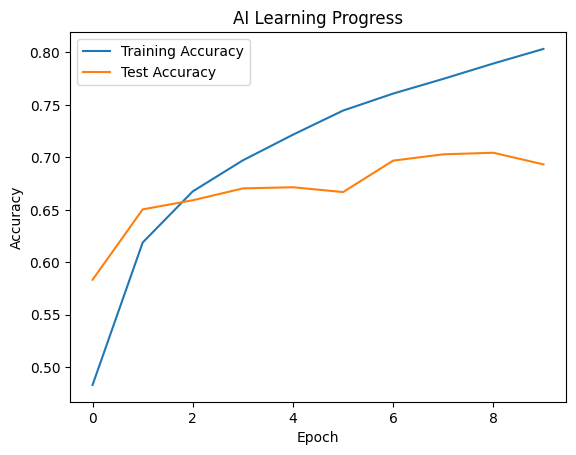

Learning progress chart created!


In [8]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('AI Learning Progress')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
print("Learning progress chart created!")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


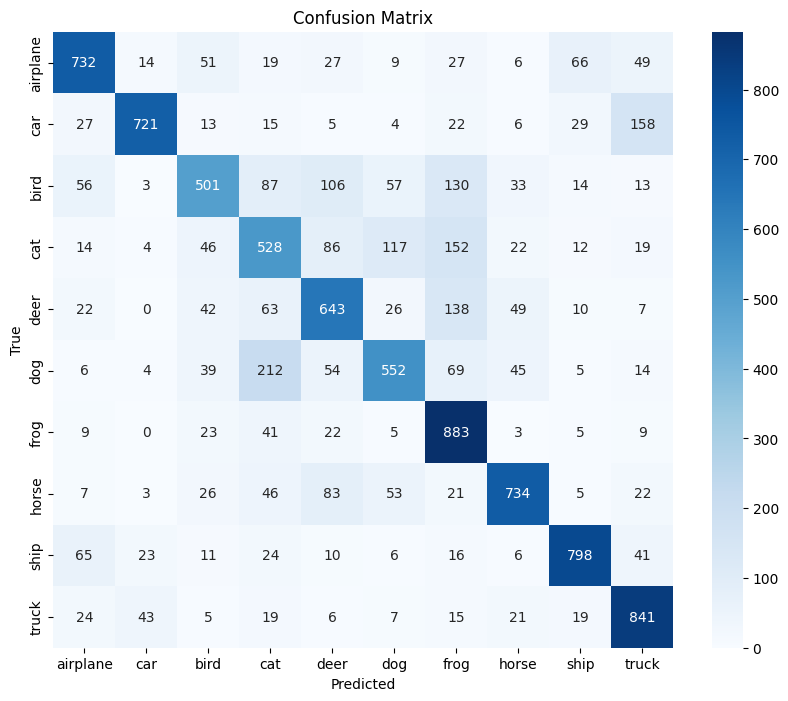

Confusion matrix created!


In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)
cm = confusion_matrix(test_labels, predicted_labels)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
print("Confusion matrix created!")

In [10]:
model.save('/content/my_ai_model.h5')
print("AI brain saved!")

AI brain saved!


In [13]:
from tensorflow.keras.applications import MobileNetV2
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
base_model.trainable = False
model_transfer = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(10, activation='softmax')
])
model_transfer.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print("Smarter AI brain built!")

/tmp/ipython-input-2067200402.py:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Smarter AI brain built!


In [14]:
history_transfer = model_transfer.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))
print("Smarter AI brain trained!")

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 14ms/step - accuracy: 0.2419 - loss: 2.1436 - val_accuracy: 0.3003 - val_loss: 1.9626
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.3016 - loss: 1.9438 - val_accuracy: 0.3061 - val_loss: 1.9231
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.3111 - loss: 1.9079 - val_accuracy: 0.3096 - val_loss: 1.9089
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.3193 - loss: 1.8969 - val_accuracy: 0.3108 - val_loss: 1.9023
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.3200 - loss: 1.8836 - val_accuracy: 0.3145 - val_loss: 1.8982
Smarter AI brain trained!


In [17]:
test_loss_transfer, test_accuracy_transfer = model_transfer.evaluate(test_images, test_labels)
print(f"Smarter AI brain accuracy: {test_accuracy_transfer*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3230 - loss: 1.8872
Smarter AI brain accuracy: 31.78%


In [18]:
model_transfer.save('/content/my_smart_ai_model.h5')
print("Smarter AI brain saved!")

Smarter AI brain saved!


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


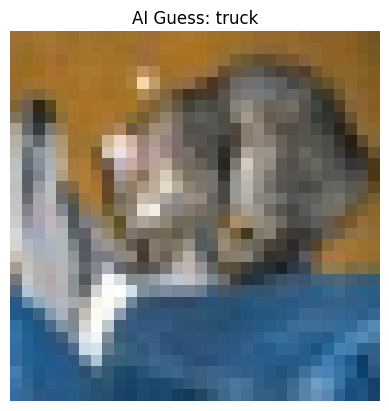

AI made a guess!


In [19]:
class_names = ['airplane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
sample_image = test_images[0]
prediction = model_transfer.predict(sample_image.reshape(1, 32, 32, 3))
predicted_label = class_names[np.argmax(prediction)]
plt.imshow(sample_image)
plt.title(f"AI Guess: {predicted_label}")
plt.axis('off')
plt.show()
print("AI made a guess!")